# Read pcapng file

In total, there are 27 captures:

- 9 packages for each of the 3 scenarios:
  - 0: none
  - 1: sign
  - 2: sign and encrypt
- For each scenario, there are 4 captures:
  - normal
  - sniffing
  - DOS
    - Certificate Infinity Chain Loop
    - Function Call Null dereference
    - Hping3 (syn flood)
    - Open Multiple Secure Channels
    - Translate Browse Path Call Stack Overflow
  - MITM
    - ARP spoofing
    - Port stealing

### Network Archtechture
- Rasp1: Server: 192.168.164.101
- Rasp2: Client: 192.168.164.102
- Attacker: 192.168.164.201

### Attack Scenarios
- For MITM attacks, consider that the packets were collected with the execution of the attack from the first packet.
- For other attacks (except those collected in a normal environment), consider the beginning of the attack at the moment the attacker entered the communication (192.168.164.201)

## Imports

In [18]:
from pcapng import FileScanner
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import sys
import os
import argparse

## Declarations

In [2]:
files_path = '../../Data/network_traffic/no_filter/'
filtered_files_path = '../../Data/network_traffic/opcua_filter/'
performance_files_path = '../../Data/get_performance/'

In [3]:
pcapng_list = [
    '0-dos_certificate_inf_chain_loop.pcapng',
    '0-dos_function_call_null_deref.pcapng',
    '0-dos_hping3.pcapng',
    '0-dos_open_multiple_secure_channels.pcapng',
    '0-dos_translate_browse_path_call_stack_overflow.pcapng',
    '0-mitm_arp.pcapng',
    '0-mitm_port.pcapng',
    '0-normal_local_server.pcapng',
    '0-sniffing.pcapng',
    '1-dos_certificate_inf_chain_loop.pcapng',
    '1-dos_function_call_null_deref.pcapng',
    '1-dos_hping3.pcapng',
    '1-dos_open_multiple_secure_channels.pcapng',
    '1-dos_translate_browse_path_call_stack_overflow.pcapng',
    '1-mitm_arp.pcapng',
    '1-mitm_port.pcapng',
    '1-normal_local_server.pcapng',
    '1-sniffing.pcapng',
    '2-dos_certificate_inf_chain_loop.pcapng',
    '2-dos_function_call_null_deref.pcapng',
    '2-dos_hping3.pcapng',
    '2-dos_open_multiple_secure_channels.pcapng',
    '2-dos_translate_browse_path_call_stack_overflow.pcapng',
    '2-mitm_arp.pcapng',
    '2-mitm_port.pcapng',
    '2-normal_local_server.pcapng',
    '2-sniffing.pcapng',
]

pcapng_filtered_list = [
    '0-dos_certificate_inf_chain_loop-filtered.pcapng',
    '0-dos_function_call_null_deref-filtered.pcapng',
    '0-dos_hping3-filtered.pcapng',
    '0-dos_open_multiple_secure_channels-filtered.pcapng',
    '0-dos_translate_browse_path_call_stack_overflow-filtered.pcapng',
    '0-mitm_arp-filtered.pcapng',
    '0-mitm_port-filtered.pcapng',
    '0-normal_local_server-filtered.pcapng',
    '0-sniffing-filtered.pcapng',
    '1-dos_certificate_inf_chain_loop-filtered.pcapng',
    '1-dos_function_call_null_deref-filtered.pcapng',
    '1-dos_hping3-filtered.pcapng',
    '1-dos_open_multiple_secure_channels-filtered.pcapng',
    '1-dos_translate_browse_path_call_stack_overflow-filtered.pcapng',
    '1-mitm_arp-filtered.pcapng',
    '1-mitm_port-filtered.pcapng',
    '1-normal_local_server-filtered.pcapng',
    '1-sniffing-filtered.pcapng',
    '2-dos_certificate_inf_chain_loop-filtered.pcapng',
    '2-dos_function_call_null_deref-filtered.pcapng',
    '2-dos_hping3-filtered.pcapng',
    '2-dos_open_multiple_secure_channels-filtered.pcapng',
    '2-dos_translate_browse_path_call_stack_overflow-filtered.pcapng',
    '2-mitm_arp-filtered.pcapng',
    '2-mitm_port-filtered.pcapng',
    '2-normal_local_server-filtered.pcapng',
    '2-sniffing-filtered.pcapng',
]

In [4]:
csv_list = [
    '0-dos_certificate_inf_chain_loop.csv',
    '0-dos_function_call_null_deref.csv',
    '0-dos_hping3.csv',
    '0-dos_open_multiple_secure_channels.csv',
    '0-dos_translate_browse_path_call_stack_overflow.csv',
    '0-mitm_arp.csv',
    '0-mitm_port.csv',
    '0-normal_local_server.csv',
    '0-sniffing.csv',
    '1-dos_certificate_inf_chain_loop.csv',
    '1-dos_function_call_null_deref.csv',
    '1-dos_hping3.csv',
    '1-dos_open_multiple_secure_channels.csv',
    '1-dos_translate_browse_path_call_stack_overflow.csv',
    '1-mitm_arp.csv',
    '1-mitm_port.csv',
    '1-normal_local_server.csv',
    '1-sniffing.csv',
    '2-dos_certificate_inf_chain_loop.csv',
    '2-dos_function_call_null_deref.csv',
    '2-dos_hping3.csv',
    '2-dos_open_multiple_secure_channels.csv',
    '2-dos_translate_browse_path_call_stack_overflow.csv',
    '2-mitm_arp.csv',
    '2-mitm_port.csv',
    '2-normal_local_server.csv',
    '2-sniffing.csv',
]

csv_filtered_list = [
    '0-dos_certificate_inf_chain_loop-filtered.csv',
    '0-dos_function_call_null_deref-filtered.csv',
    '0-dos_hping3-filtered.csv',
    '0-dos_open_multiple_secure_channels-filtered.csv',
    '0-dos_translate_browse_path_call_stack_overflow-filtered.csv',
    '0-mitm_arp-filtered.csv',
    '0-mitm_port-filtered.csv',
    '0-normal_local_server-filtered.csv',
    '0-sniffing-filtered.csv',
    '1-dos_certificate_inf_chain_loop-filtered.csv',
    '1-dos_function_call_null_deref-filtered.csv',
    '1-dos_hping3-filtered.csv',
    '1-dos_open_multiple_secure_channels-filtered.csv',
    '1-dos_translate_browse_path_call_stack_overflow-filtered.csv',
    '1-mitm_arp-filtered.csv',
    '1-mitm_port-filtered.csv',
    '1-normal_local_server-filtered.csv',
    '1-sniffing-filtered.csv',
    '2-dos_certificate_inf_chain_loop-filtered.csv',
    '2-dos_function_call_null_deref-filtered.csv',
    '2-dos_hping3-filtered.csv',
    '2-dos_open_multiple_secure_channels-filtered.csv',
    '2-dos_translate_browse_path_call_stack_overflow-filtered.csv',
    '2-mitm_arp-filtered.csv',
    '2-mitm_port-filtered.csv',
    '2-normal_local_server-filtered.csv',
    '2-sniffing-filtered.csv',
]

In [9]:
performance_list = [
    '0-dos_certificate_inf_chain_loop.csv',
    '0-dos_function_call_null_deref.csv',
    '0-dos_hping3.csv',
    '0-dos_open_multiple_secure_channels.csv',
    '0-dos_translate_browse_path_call_stack_overflow.csv',
    '0-mitm_arp.csv',
    '0-mitm_port.csv',
    '0-normal_local_server.csv',
    '1-dos_certificate_inf_chain_loop.csv',
    '1-dos_function_call_null_deref.csv',
    '1-dos_hping3.csv',
    '1-dos_open_multiple_secure_channels.csv',
    '1-dos_translate_browse_path_call_stack_overflow.csv',
    '1-mitm_arp.csv',
    '1-mitm_port.csv',
    '1-normal_local_server.csv',
    '2-dos_certificate_inf_chain_loop.csv',
    '2-dos_function_call_null_deref.csv',
    '2-dos_hping3.csv',
    '2-dos_open_multiple_secure_channels.csv',
    '2-dos_translate_browse_path_call_stack_overflow.csv',
    '2-mitm_arp.csv',
    '2-mitm_port.csv',
    '2-normal_local_server.csv',
]

## Pre-processing

### Functions

In [6]:
def create_concat_dataframe(path: str, files_list: list) -> pd.DataFrame:
    dfs = []

    for elem in files_list:
        file_parts = elem.split("-")
        file_type = int(file_parts[0])
        file_name = file_parts[1].split(".")[0]
        
        df = pd.read_csv(path+elem)
        df_new = pd.DataFrame()
        df_new['Type'] = [file_type] * len(df)
        df_new['Name'] = [file_name] * len(df)
        
        df = pd.concat([df_new, df], axis=1)
        
        dfs.append(df)

    network_traffic = pd.concat(dfs, ignore_index=True)

    return network_traffic

In [7]:
def create_separated_dataframe(path: str, csv_file: str) -> pd.DataFrame:
    file_parts = csv_file.split("-")
    file_type = int(file_parts[0])
    file_name = file_parts[1].split(".")[0]
    
    df = pd.read_csv(path+csv_file)
    df_new = pd.DataFrame()
    df_new['Type'] = [file_type] * len(df)
    df_new['Name'] = [file_name] * len(df)
    
    df = pd.concat([df_new, df], axis=1)

    return df

### Initialize Dataframes

In [15]:
network_traffic_filtered = create_concat_dataframe(filtered_files_path, csv_filtered_list)
network_traffic_filtered = network_traffic_filtered[network_traffic_filtered['Time'] <= 60.000000]

In [16]:
network_traffic_no_filter = create_concat_dataframe(files_path, csv_list)
network_traffic_no_filter = network_traffic_no_filter[network_traffic_no_filter['Time'] <= 60.000000]
performance_results = create_concat_dataframe(performance_files_path, performance_list)

#### Create separated dataframes for each scenario

In [12]:
# separated_dataframes = {}

# for csv_file in csv_list:
#     df_name = csv_file.split(".")[0]
#     aux_df = create_separated_dataframe(files_path, csv_file)
#     separated_dataframes[df_name] = aux_df

# network_traffic_no_filter = separated_dataframes['0-dos_certificate_inf_chain_loop']
# performance_results = separated_dataframes['0-dos_function_call_null_deref']

# network_traffic_no_filter = network_traffic_no_filter[network_traffic_no_filter['Time'] <= 60.000000]  # Prune the data to only include 1 minute
# performance_results = create_separated_dataframe(performance_files_path, performance_list)

In [25]:
network_traffic_no_filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7885078 entries, 0 to 9949868
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Type         int64  
 1   Name         object 
 2   No.          int64  
 3   Time         float64
 4   Source       object 
 5   Destination  object 
 6   Protocol     object 
 7   Length       int64  
 8   Info         object 
dtypes: float64(1), int64(3), object(5)
memory usage: 601.6+ MB


## Queries

In [35]:
# attack_name = 'dos_certificate_inf_chain_loop'
# attack_name = 'dos_function_call_null_deref'
attack_name = 'dos_hping3'
# attack_name = 'dos_open_multiple_secure_channels'
# attack_name = 'dos_translate_browse_path_call_stack_overflow'
# attack_name = 'mitm_arp'
# attack_name = 'mitm_port'
# attack_name = 'normal_local_server'
# attack_name = 'sniffing'

In [36]:
attack_no_filter_0 = network_traffic_no_filter[(network_traffic_no_filter['Type'] == 0) & (network_traffic_no_filter['Name'] == attack_name)]
attack_no_filter_1 = network_traffic_no_filter[(network_traffic_no_filter['Type'] == 1) & (network_traffic_no_filter['Name'] == attack_name)]
attack_no_filter_2 = network_traffic_no_filter[(network_traffic_no_filter['Type'] == 2) & (network_traffic_no_filter['Name'] == attack_name)]
attack_filtered_0 = network_traffic_filtered[(network_traffic_filtered['Type'] == 0) & (network_traffic_filtered['Name'] == attack_name)]
attack_filtered_1 = network_traffic_filtered[(network_traffic_filtered['Type'] == 1) & (network_traffic_filtered['Name'] == attack_name)]
attack_filtered_2 = network_traffic_filtered[(network_traffic_filtered['Type'] == 2) & (network_traffic_filtered['Name'] == attack_name)]

# plt.figure()
# plt.plot(scenario_data['Time'], scenario_data['Data'], label=f'Scenario {scenario}')
# plt.xlabel('Time')
# plt.ylabel('Data')
# plt.title(f'Scenario {scenario} Data')
# plt.legend()
# plt.show()

# Compare data from different scenarios
# plt.figure()
# for scenario in range(3):
#     scenario_data = network_traffic_no_filter[network_traffic_no_filter['Type'] == scenario]
    
#     # Plot the data
#     plt.plot(scenario_data['Time'], scenario_data['Data'], label=f'Scenario {scenario}')
# plt.xlabel('Time')
# plt.ylabel('Data')
# plt.title('Comparison of Data from Different Scenarios')
# plt.legend()
# plt.show()


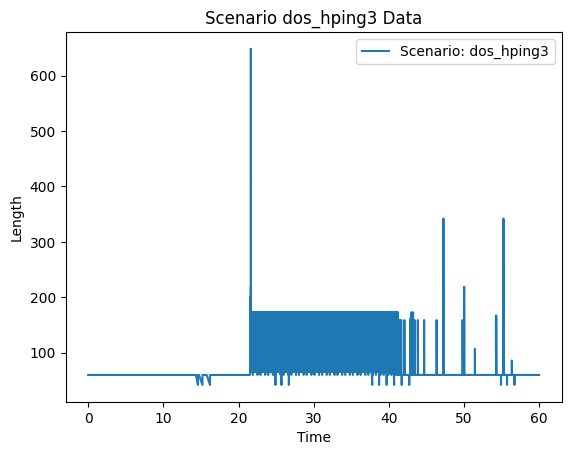

In [37]:
plt.figure()
plt.plot(attack_no_filter_0['Time'], attack_no_filter_0['Length'], label=f'Scenario: {attack_name}')
plt.xlabel('Time')
plt.ylabel('Length')
plt.title(f'Scenario {attack_name} Data')
plt.legend()
plt.show()